In [1]:
import os
os.getcwd()

'/Users/hiruniliyanage/Documents/ml-from-scratch/regression/basic-linear-regression'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Loading the data 
salary_data = pd.read_csv('data/Salary_Data.csv.xls')

#First 5 rows of the dataset
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
#Checking any missing values
print(salary_data.isnull().sum())

YearsExperience    0
Salary             0
dtype: int64


Text(0, 0.5, 'Salaries')

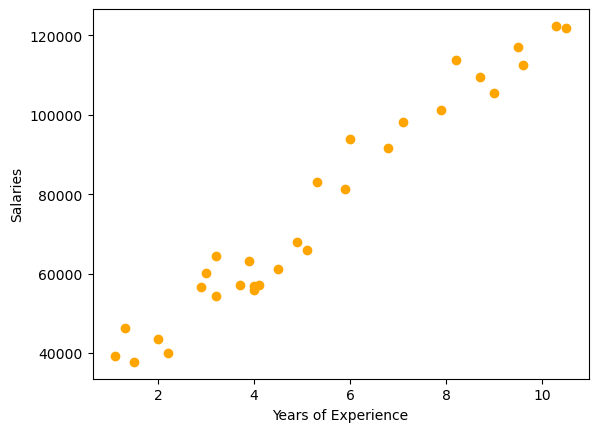

In [9]:
plt.scatter(salary_data['YearsExperience'],salary_data['Salary'], color='orange')
plt.xlabel('Years of Experience')
plt.ylabel('Salaries')

In [11]:
#Define the features (Independent and Dependent variables)

X = salary_data.iloc[:,0:1].values
y = salary_data.iloc[:,-1].values
print(X.shape, y.shape)

(30, 1) (30,)


In [13]:
#Splitting the dataset into train-set and test-set
#20% goes to testing data-set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=2)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")


Training set size: (24, 1)
Testing set size: (6, 1)


In [15]:
#Scaling the data before training. 
from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()
scaler_y = StandardScaler()

#Fit on training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.reshape(-1,1)).flatten()

"""
.fit() learns the mean and std from FROM this data
.transform() Apply that learning to the SAME data

"""



#Transform test data with same scaler 

"""
 Use the same mean and std from the training data and use here, 
 no need to calculate a new mean, std from the test data,
 hence using .transform()

 """
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.reshape(-1, 1)).flatten()

In [17]:
#Training the model 
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [19]:
#train model on the training set

model.fit(X_train_scaled, y_train_scaled)
print("The slope is, ", model.coef_)
print("The Intercept is, ", model.intercept_)

The slope is,  [0.98258606]
The Intercept is,  -8.768524495978613e-17


Text(0, 0.5, 'Salaries')

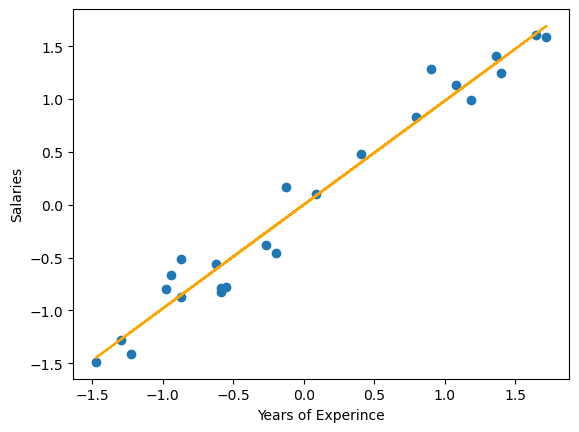

In [21]:
#Plot all the points
plt.scatter(X_train_scaled, y_train_scaled)
plt.plot(X_train_scaled, model.predict(X_train_scaled), color='orange')
plt.xlabel('Years of Experince')
plt.ylabel('Salaries')

Text(0, 0.5, 'Salaries')

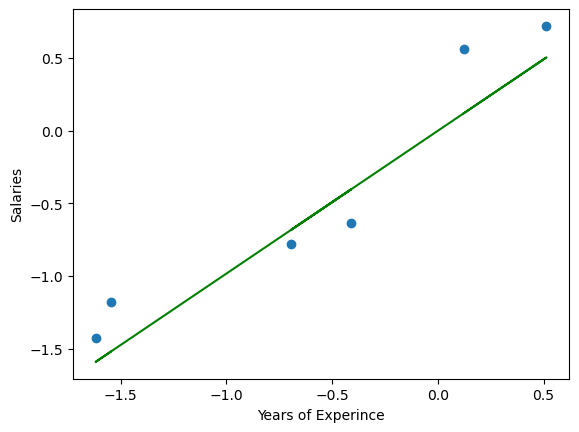

In [23]:
#Plot for the test data points
plt.scatter(X_test_scaled, y_test_scaled)
plt.plot(X_test_scaled, model.predict(X_test_scaled), color='green')
plt.xlabel('Years of Experince')
plt.ylabel('Salaries')

In [25]:
y_pred_scaled = model.predict(X_test_scaled)
y_pred_scaled

array([-1.52064487, -1.59049267, -0.40308003, -0.68247124,  0.50494141,
        0.12077849])

In [27]:
#Unscale the values
y_pred_original = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).flatten()
y_pred_original

array([36833.63210301, 34919.71472592, 67456.3101364 , 59800.64062805,
       92337.23603852, 81810.69046455])

In [29]:
#Unscale y_test_scaled back
y_test_from_scaled = scaler_y.inverse_transform(y_test_scaled.reshape(-1,1)).flatten()

#Compare with the original y_test
print("Are they equal: ", np.allclose(y_test, y_test_from_scaled))
print("Max difference", np.max(np.abs(y_test - y_test_from_scaled)))
    

Are they equal:  True
Max difference 0.0


## Evaluation of Matrics 

### 1. Mean Squared Error(MSE)

In [196]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
"""
 MSE = average((actual - predicted)²)

"""

mse_scaled = mean_squared_error(y_test_scaled,y_pred_scaled)
print("Mean Squared Error: ",mse_scaled)

Mean Squared Error:  0.07476739850379872


In [198]:
#Un-scaled version
mse_original = mean_squared_error(y_test,y_pred_original)
print("Mean Squared Error: ", mse_original)

Mean Squared Error:  56137509.99782556


### 2. Mean Absolute Error(MAE)

In [201]:
"""
  MAE = average(|actual - predicted|)
  {mae_original) standard deviations off on average.
  Explains the Average error

"""

mae_scaled = mean_absolute_error(y_test_scaled,y_pred_scaled)
print("Mean Absolute Error: ",mae_scaled)

Mean Absolute Error:  0.248265264894599


In [203]:
#Un-scaled version 
mae_original = mean_absolute_error(y_test,y_pred_original)
print("Mean Absolute Error: ",mae_original)

Mean Absolute Error:  6802.7795720739


### 3. Root Mean Squared Error

In [206]:
"""
RMSE = √MSE
Typically (mse_original} standard deviations off.
Explain the Typical error.
"""

mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
root_mse_scaled = mse_scaled**0.5

print("Root Mean Squared:", root_mse_scaled)

#Second way of finding the Root Mean Squared
print("Root Mean Squared:", np.sqrt(mse_scaled))

Root Mean Squared: 0.27343627868993303
Root Mean Squared: 0.27343627868993303


In [208]:
#Un-scaled version
mse_original= mean_squared_error(y_test, y_pred_original)
root_mse_original = mse_original**0.5

print("Root Mean Squared:", root_mse_original)
print("Root Mean Squared:",np.sqrt(mse_original))

Root Mean Squared: 7492.496913434504
Root Mean Squared: 7492.496913434504


### 4. R2 Score

In [211]:
"""
R² = 1 - (sum of squared errors) / (total variance)

- What percentage of variation does your model explain?
- 0 to 1 scale (or 0% to 100%)
"""

r2_scaled = r2_score(y_test_scaled, y_pred_scaled)
print("R2 Score:" , r2_scaled)

R2 Score: 0.8886956733784562


In [213]:
#Un-scaled version
r2_original = r2_score(y_test, y_pred_original)
print("R2 Score:", r2_original)

R2 Score: 0.8886956733784563


### 5. Adjusted R2 Score

In [216]:
r2score_scaled = r2_score(y_test_scaled, y_pred_scaled)
N = X_test_scaled.shape[0]

numerator = (1-r2score_scaled)*(N-1)
denominator = N-1-1
adjusted_r2score_scaled = 1 - (numerator/denominator)
print("Adjusted R2 Score:" , adjusted_r2score_scaled)


Adjusted R2 Score: 0.8608695917230703


In [218]:
#Un-scaled version
r2score_original = r2_score(y_test, y_pred_original)
N = X_test.shape[0]

numerator = (1 - r2score_original)*(N-1)
denominator = N-1-1
adjusted_r2score_original = 1-(numerator/denominator)
print("Adjusted R2 Score:", adjusted_r2score_original)

Adjusted R2 Score: 0.8608695917230704


In [220]:
#Scaled Values 
print("Mean Squared Error: ",mse_scaled)
print("Mean Absolute Error: ",mae_scaled)
print("Root Mean Squared:", root_mse_scaled)
print("R2 Score:" , r2_scaled)
print("Adjusted R2 Score:" , adjusted_r2score_scaled)

Mean Squared Error:  0.07476739850379872
Mean Absolute Error:  0.248265264894599
Root Mean Squared: 0.27343627868993303
R2 Score: 0.8886956733784562
Adjusted R2 Score: 0.8608695917230703


- ---------------------------------------------------------------------------------

In [223]:
#Original Values
print(f"Mean Squared Error:{mse_original:,.2f}")
print()
print("Root Mean Squared:", root_mse_original)
print(f"Our predictions are typically off by about ${root_mse_original:,.2f}\n")
print("Mean Absolute Error: ",mae_original)
print(f"We are off by {mae_original:,.2f} on average\n")
print(f"R2 Score:{r2_original:,.2f}")
print(f"Model explains {r2_original*100:,.2f}% of why values differ\n")
print("Adjusted R2 Score:", adjusted_r2score_original)

Mean Squared Error:56,137,510.00

Root Mean Squared: 7492.496913434504
Our predictions are typically off by about $7,492.50

Mean Absolute Error:  6802.7795720739
We are off by 6,802.78 on average

R2 Score:0.89
Model explains 88.87% of why values differ

Adjusted R2 Score: 0.8608695917230704


- ---------------------------------------------------------------------------------

In [226]:
#From y_test data
min_value = np.min(y_test)
max_value = np.max(y_test)
mean_value = np.mean(y_test)
std_value = np.std(y_test)

print(f"Actual range: ${min_value:,.06} to ${max_value:,.06}")
print(f"Mean: ${mean_value:,.0f}")
print(f"Std Dev: ${std_value:,.0f}")
print(f"RMSE as % of mean: {(7492/mean_value)*100:.2f}%")

Actual range: $39,343.0 to $98,273.0
Mean: $66,010
Std Dev: $22,458
RMSE as % of mean: 11.35%


In [228]:
Error_percentage = (mae_original/mean_value)*100
print(f"{Error_percentage:,.2f}%") #the error is moderate. acceptable.

10.31%



 
 
 
 - R² (coefficient of determination) measures proportion of variance explained, not absolute accuracy. It stays the same whether you're predicting in dollars, standardized units, or any linear transformation!
   
 - RMSE (unscaled) = 7,492.50 and R² = 0.88 (88.9%)<br>
   Understanding R² relationship<br>

   
R² = 1 - (MSE / Variance)<br>
0.88 = 1 - (56,137,509.99 / Variance)<br>

Solve for Variance:<br>
   Variance = 56,137,509.99 / (1 - 0.88)<br>
   Variance = 504,000,000<br>

Convert Variance to Standard Deviation\
   Standard Deviation = √Variance\
   σ = √504,000,000\
   σ ≈ $22,450
   
Estimate Data Range from Standard Deviation\
   Range ≈ 4σ (covers ~95% of data)\
   Range ≈ 4 × `$22,450 = $89,800`\
   So data likely spans: `$X to $(X + 89,800)`

Consider Your RMSE Relative to Range:\
   RMSE/Range = 7,492 / 89,800 = 8.3%<br>
   
   5-10% error = Good model

   10-20% error = Moderate model

   20%+ error = Needs improvement
   
   